# Assignment 2, Q6
Sagrika Nagar(20171204)

# Q6 Part 1

In [2]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from math import floor
from math import exp

In [3]:
def bilateral_filt(im, ksize, sigmad, sigmar):
    
    out = np.zeros(im.shape)
    x, y, n = im.shape  
    temp = np.zeros((x+ksize-1, y+ksize-1,n))
    temp[ksize-1:x+ksize-1, ksize-1:y+ksize-1] = im
    weight = np.ones((ksize, ksize, n))
    mid = floor(ksize/2)
    for i in range(x):
        for j in range(y):
            im_part1 = temp[i:i+ksize, j:j+ksize, 0]
            im_part2 = temp[i:i+ksize, j:j+ksize, 1]
            im_part3 = temp[i:i+ksize, j:j+ksize, 2]
            for l in range(ksize):
                for k in range(ksize):
                    w1=exp((-1/(2*sigmad**2))*((l-mid)**2+(k-mid)**2))
                    w2=exp((-1/(2*sigmar**2))*((im_part1[l,k]-im_part1[mid,mid])**2))
                    w3=exp((-1/(2*sigmar**2))*((im_part2[l,k]-im_part2[mid,mid])**2))
                    w4=exp((-1/(2*sigmar**2))*((im_part3[l,k]-im_part3[mid,mid])**2))
                    weight[l,k,0]=w1*w2
                    weight[l,k,1]=w1*w2
                    weight[l,k,2]=w1*w2
            weight=weight/np.sum(weight)
            out[i,j, 0]= np.sum(np.multiply(im_part1,weight[:,:,0]))
            out[i,j, 1]= np.sum(np.multiply(im_part2,weight[:,:,1]))
            out[i,j, 2]= np.sum(np.multiply(im_part3,weight[:,:,2]))
    cv2.normalize(out, out, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    
    out = out.astype(np.uint8)

    return out
                    
                    

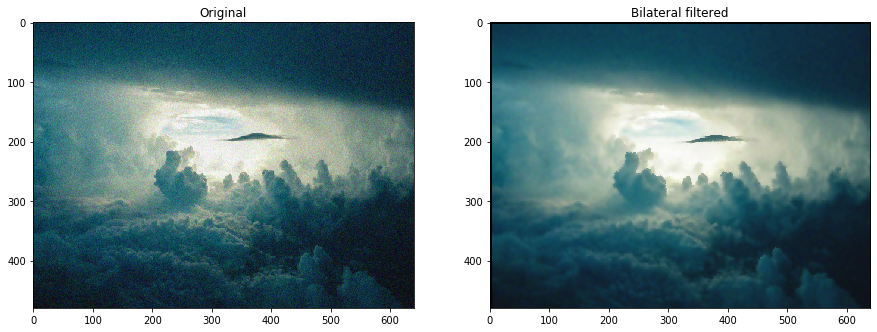

In [58]:
im = cv2.imread("sky.png")

out = bilateral_filt(im,7,12,20)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(121)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Bilateral filtered")
plt.show()

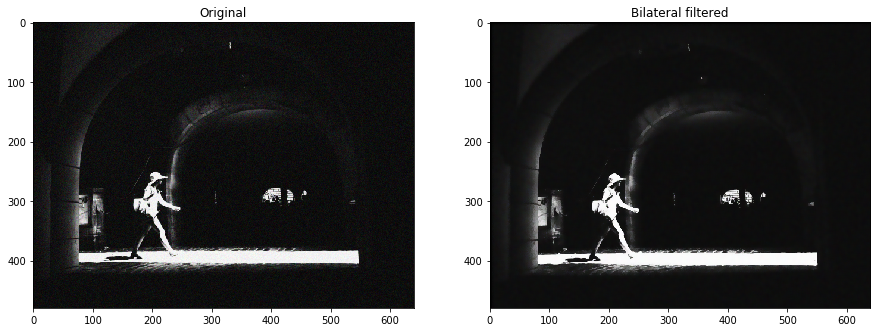

In [61]:
im = cv2.imread("noir.png")

out = bilateral_filt(im,7,12,16)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(121)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Bilateral filtered")
plt.show()

# Q6 Part 2


In [5]:
def calculateDistance(i1, i2):#60 15
    return np.sqrt(np.sum((i1-i2)**2))

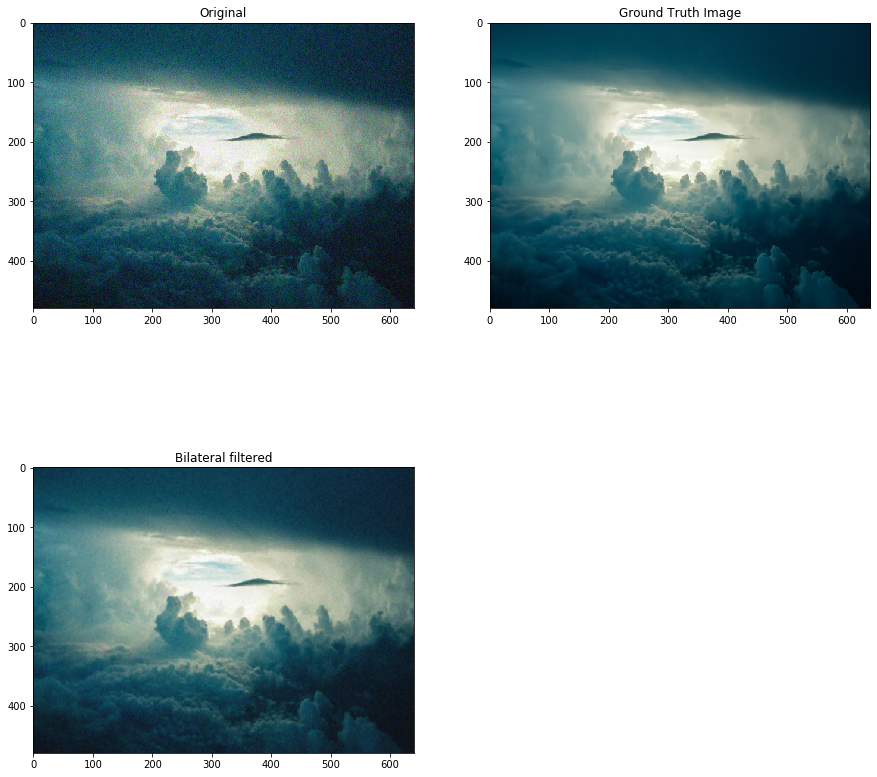

6797.423997368415


In [7]:
im1 = cv2.imread("sky.png")
im2 = cv2.imread("gt_sky.png")
out = bilateral_filt(im1, 3, 25, 60)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(221)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.title("Ground Truth Image")
plt.subplot(223)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Bilateral filtered")
plt.show()
print(calculateDistance(im2, out))

# for sky.png
Value of domain sigma: 25 <br>
Value of range sigma: 60 <br>
Window size: 3x3  <br>
L2 Distance: 6797.423997368415

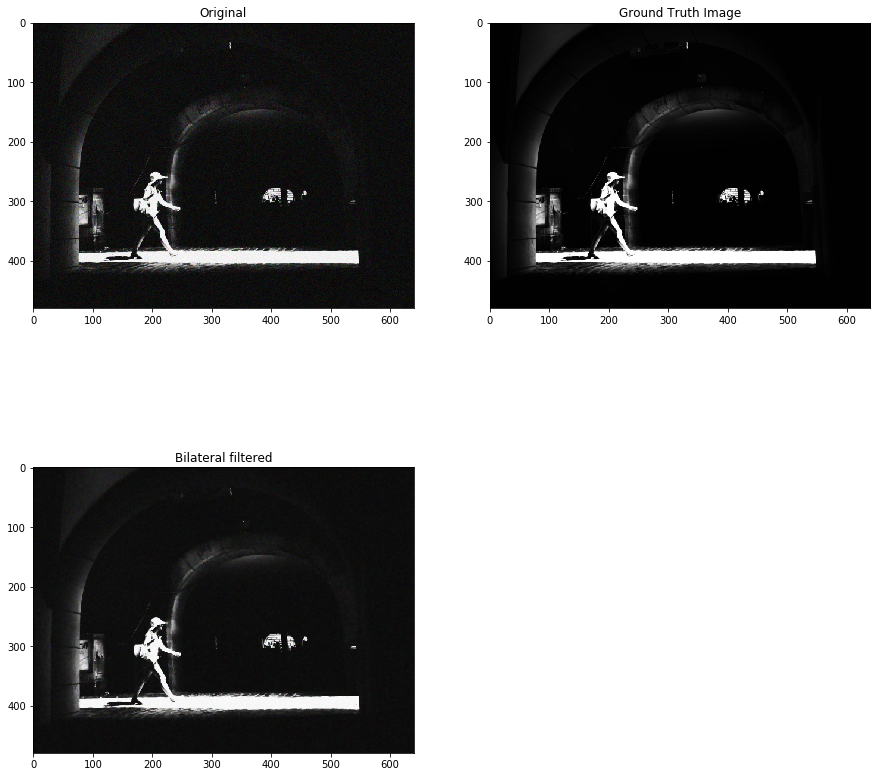

9815.296531435002


In [8]:
im1 = cv2.imread("noir.png")
im2 = cv2.imread("gt_noir.png")

out = bilateral_filt(im1, 3, 60, 15)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(221)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.title("Ground Truth Image")
plt.subplot(223)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Bilateral filtered")
plt.show()
print(calculateDistance(im2, out))

# for noir.png
Value of domain sigma: 60 <br>
Value of range sigma: 15 <br>
Window size: 3x3  <br>
L2 Distance: 9815.296531435002